### Q&A Activity Question Week -15

Activity Description : 

Jio fibre wants to implement AI/ML in their systems. The activity task
is to build a network intrusion detector, a predictive model capable of
distinguishing between ``bad&#39;&#39; connections, called intrusions or attacks, and ``good&#39;&#39; normal connections.
This database contains a standard set of data to be audited, which
includes a wide variety of intrusions in the network environment. Your
target is building a machine efficient learning model using
probabilistic approach models, probabilities of bad or good
connections using naïve bayes model. This is a multi-class
classification. Fine tune the model and make a model which has at
least 97 percent accuracy.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
df = pd.read_csv('tcp-connection (1).csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'
494017,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
494018,0,b'tcp',b'smtp',b'SF',2152,327,0,0,0,0,...,123,0.91,0.02,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
494019,0,b'tcp',b'http',b'SF',283,1270,0,0,0,0,...,255,1.00,0.00,0.14,0.06,0.0,0.0,0.0,0.0,b'normal.'


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

- > 23 integer, 15 float, 4 object type features are there in the dataset

In [45]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

- > No null values can be seen in the dataset

In [47]:
df.intrusion.unique()

array(["b'normal.'", "b'smurf.'", "b'neptune.'", "b'warezclient.'",
       "b'satan.'", "b'back.'", "b'ipsweep.'", "b'portsweep.'",
       "b'teardrop.'", "b'guess_passwd.'", "b'nmap.'", "b'imap.'",
       "b'pod.'", "b'phf.'", "b'loadmodule.'", "b'buffer_overflow.'",
       "b'warezmaster.'", "b'land.'", "b'rootkit.'", "b'perl.'",
       "b'multihop.'", "b'ftp_write.'", "b'spy.'"], dtype=object)

In [48]:
df.service.unique()

array(["b'domain_u'", "b'smtp'", "b'ecr_i'", "b'private'", "b'http'",
       "b'auth'", "b'ftp_data'", "b'other'", "b'eco_i'", "b'finger'",
       "b'uucp'", "b'name'", "b'ftp'", "b'ssh'", "b'vmnet'",
       "b'remote_job'", "b'urp_i'", "b'hostnames'", "b'kshell'",
       "b'time'", "b'supdup'", "b'ctf'", "b'telnet'", "b'link'",
       "b'systat'", "b'sql_net'", "b'printer'", "b'ntp_u'", "b'exec'",
       "b'whois'", "b'netbios_ssn'", "b'csnet_ns'", "b'domain'",
       "b'shell'", "b'iso_tsap'", "b'daytime'", "b'netbios_ns'",
       "b'imap4'", "b'gopher'", "b'nntp'", "b'pop_3'", "b'mtp'",
       "b'netbios_dgm'", "b'http_443'", "b'efs'", "b'pop_2'", "b'X11'",
       "b'login'", "b'echo'", "b'uucp_path'", "b'klogin'", "b'Z39_50'",
       "b'rje'", "b'courier'", "b'nnsp'", "b'discard'", "b'ldap'",
       "b'IRC'", "b'netstat'", "b'bgp'", "b'sunrpc'", "b'urh_i'",
       "b'tim_i'", "b'tftp_u'", "b'red_i'", "b'pm_dump'"], dtype=object)

In [49]:
df['intrusion'] = df['intrusion'].str.strip('b').str.replace("'", "")
df['protocol_type'] = df['protocol_type'].str.strip('b').str.replace("'", "")
df['service'] = df['service'].str.strip('b').str.replace("'", "")
df['flag'] = df['flag'].str.strip('b').str.replace("'", "")
df['intrusion'] = df['intrusion'].str.rstrip('.')

In [50]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,udp,domain_u,SF,44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,smtp,SF,1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,normal
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
4,0,tcp,private,S0,0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,neptune
494017,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
494018,0,tcp,smtp,SF,2152,327,0,0,0,0,...,123,0.91,0.02,0.01,0.00,0.0,0.0,0.0,0.0,normal
494019,0,tcp,http,SF,283,1270,0,0,0,0,...,255,1.00,0.00,0.14,0.06,0.0,0.0,0.0,0.0,normal


### Categorizing Intrusion types

In [51]:
Intrusion_types = {
    'normal': 'normal',
    'back': 'dos','land': 'dos','neptune': 'dos', 'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos',
    'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r',
    'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'spy': 'r2l', 
    'warezclient': 'r2l', 'warezmaster': 'r2l',
    'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'satan': 'probe',
}

In [52]:
df.replace({'intrusion': Intrusion_types}, inplace = True)
df['intrusion'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: intrusion, dtype: int64

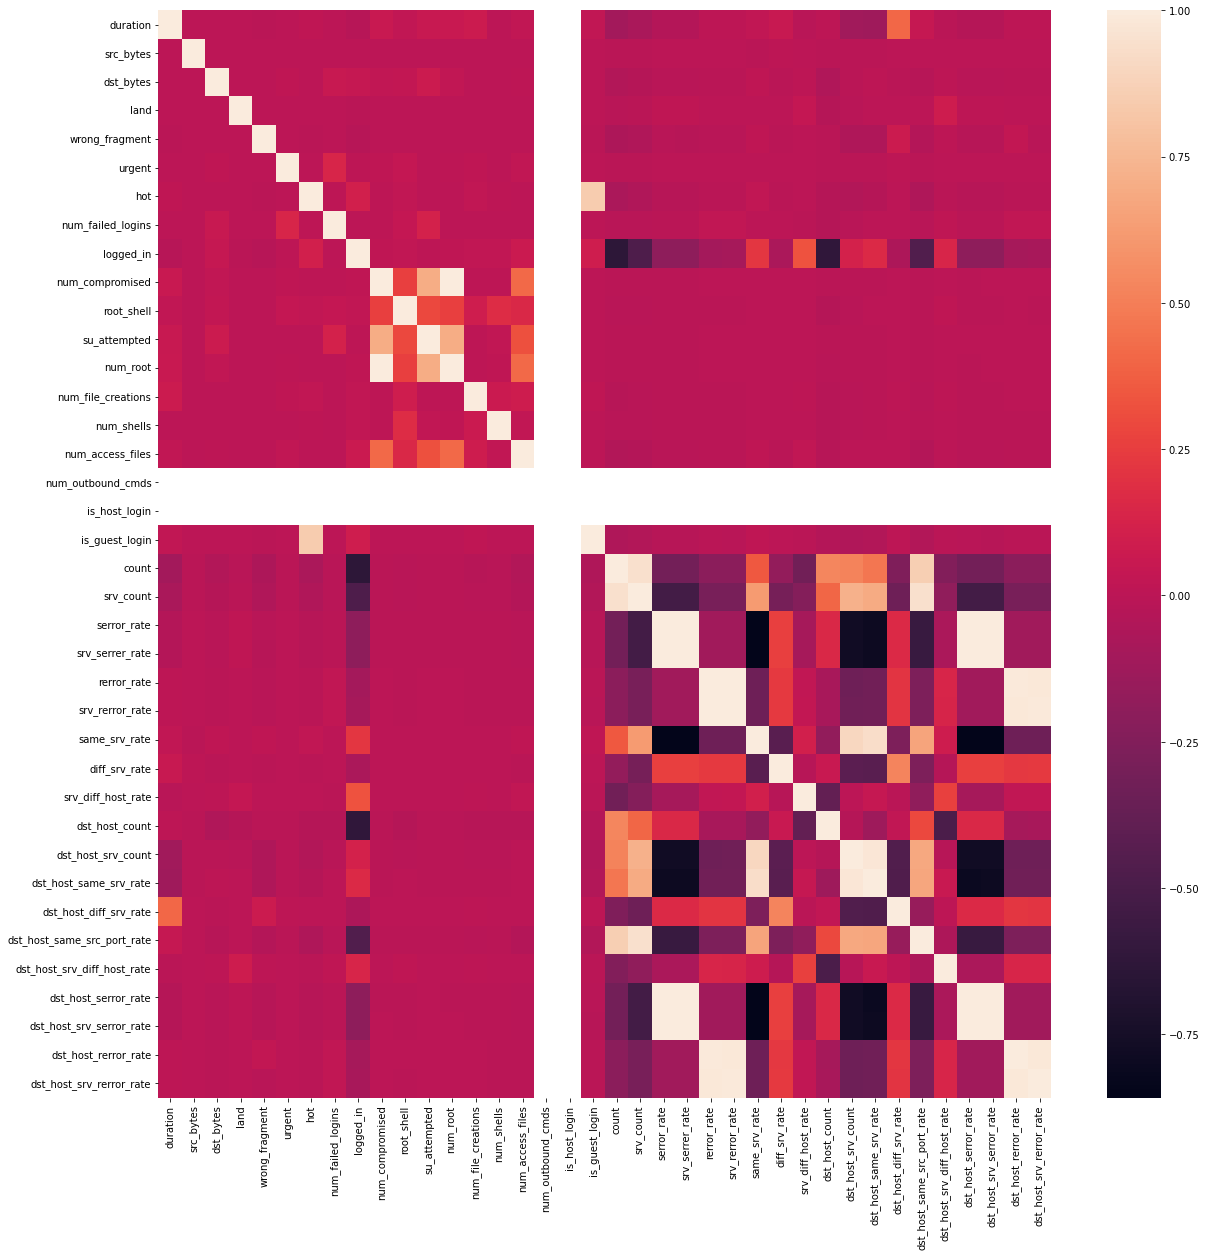

In [53]:
# Feature Selection

corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix)
plt.show()

In [54]:
df['num_outbound_cmds'].value_counts()

0    494021
Name: num_outbound_cmds, dtype: int64

In [55]:
df['is_host_login'].value_counts()

0    494021
Name: is_host_login, dtype: int64

In [56]:
# Both the num_outbound_cmds and is_host_login columns has only zero value
# Therefore we drop those columns

In [57]:
df.drop(columns=['num_outbound_cmds', 'is_host_login'], axis = 1, inplace = True)

In [58]:
corr_matrix = df.corr()
corr_matrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,...,-0.007139,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105305,0.007348,...,-0.026366,-0.038730,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,...,-0.621029,0.119315,0.161070,-0.061151,-0.461558,0.140493,-0.190955,-0.191704,-0.090868,-0.087885
num_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,...,-0.008361,-0.004797,-0.002584,0.000359,-0.006715,0.000621,-0.001978,-0.001631,-0.000843,-0.000873


In [59]:
# Dropping columns with high correlation value

df.drop(columns=['num_root', 'srv_serrer_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 
                'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate'], axis = 1, inplace=True)


In [60]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion
0,0,udp,domain_u,SF,44,134,0,0,0,0,...,0.0,1.00,0.00,0.01,139,89,0.01,0.01,0.00,normal
1,0,tcp,smtp,SF,1489,385,0,0,0,0,...,0.0,1.00,0.00,1.00,5,116,0.00,0.20,0.02,normal
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255,255,0.00,1.00,0.00,dos
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255,255,0.00,1.00,0.00,dos
4,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.03,0.07,0.00,255,6,0.07,0.00,0.00,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.02,0.06,0.00,255,5,0.08,0.00,0.00,dos
494017,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255,255,0.00,1.00,0.00,dos
494018,0,tcp,smtp,SF,2152,327,0,0,0,0,...,0.0,1.00,0.00,0.00,135,123,0.02,0.01,0.00,normal
494019,0,tcp,http,SF,283,1270,0,0,0,0,...,0.0,1.00,0.00,0.00,7,255,0.00,0.14,0.06,normal


### Encoding

In [63]:
le = LabelEncoder()
df['flag'] = le.fit_transform(df['flag'])
df['service'] = le.fit_transform(df['service'])

df = pd.get_dummies(data=df, columns=['protocol_type'])
df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,11,9,44,134,0,0,0,0,0,...,0.01,139,89,0.01,0.01,0.00,normal,0,0,1
1,0,50,9,1489,385,0,0,0,0,0,...,1.00,5,116,0.00,0.20,0.02,normal,0,1,0
2,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,255,0.00,1.00,0.00,dos,1,0,0
3,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,255,0.00,1.00,0.00,dos,1,0,0
4,0,45,5,0,0,0,0,0,0,0,...,0.00,255,6,0.07,0.00,0.00,dos,0,1,0


### Standardization/Normalization

In [64]:
X = df.drop('intrusion', axis =1)
y = df['intrusion']

scale = StandardScaler()
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Naive-Bayes

In [69]:
# Gaussian Naive-Bayes

gnb = GaussianNB()
model_1 = gnb.fit(X_train, y_train)
gnb_predict = model_1.predict(X_test)

In [70]:
accuracy_score(y_test, gnb_predict)    

0.8926268913516523

The accuracy_score of Gaussian Naive-Bayes is 89.26%

In [71]:
# Bernoulli Naive-Bayes

In [72]:
bnb = BernoulliNB()
model_2 = bnb.fit(X_train, y_train)
bnb_predict = model_2.predict(X_test)

In [73]:
accuracy_score(y_test, bnb_predict)

0.7681291432619807

The accuracy_score of Bernoulli Naive-Bayes is 76.8%

In [74]:
# Multinomial Naive-Bayes

In [76]:
X = df.drop('intrusion', axis =1)
y = df['intrusion']
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
mnb = MultinomialNB()
model_3 = mnb.fit(X_train, y_train)
mnb_predict = model_3.predict(X_test)

In [79]:
accuracy_score(y_test, mnb_predict)

0.9869541015130813

The accuracy_score of Multinomial Naive-Bayes is 98.7%

Multinomial Naive-Bayes seems way better than other Naive Bayes models and we've surpassed the objective accuracy of 97%